#  Judge, Jury, and Classifier: An Introduction to Trees

In [24]:
stevens = read.csv("stevens.csv")

In [25]:
str(stevens)

'data.frame':	566 obs. of  9 variables:
 $ Docket    : Factor w/ 566 levels "00-1011","00-1045",..: 63 69 70 145 97 181 242 289 334 436 ...
 $ Term      : int  1994 1994 1994 1994 1995 1995 1996 1997 1997 1999 ...
 $ Circuit   : Factor w/ 13 levels "10th","11th",..: 4 11 7 3 9 11 13 11 12 2 ...
 $ Issue     : Factor w/ 11 levels "Attorneys","CivilRights",..: 5 5 5 5 9 5 5 5 5 3 ...
 $ Petitioner: Factor w/ 12 levels "AMERICAN.INDIAN",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Respondent: Factor w/ 12 levels "AMERICAN.INDIAN",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ LowerCourt: Factor w/ 2 levels "conser","liberal": 2 2 2 1 1 1 1 1 1 1 ...
 $ Unconst   : int  0 0 0 0 0 1 0 1 0 0 ...
 $ Reverse   : int  1 1 1 1 1 0 1 1 1 1 ...


In [26]:
head(stevens)

,Docket,Term,Circuit,Issue,Petitioner,Respondent,LowerCourt,Unconst,Reverse
1,93-1408,1994,2nd,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
2,93-1577,1994,9th,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
3,93-1612,1994,5th,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
4,94-623,1994,1st,EconomicActivity,BUSINESS,BUSINESS,conser,0,1
5,94-1175,1995,7th,JudicialPower,BUSINESS,BUSINESS,conser,0,1
6,95-129,1995,9th,EconomicActivity,BUSINESS,BUSINESS,conser,1,0


In [27]:
# #Docket - Unique Identifier for each case
# #Term - Year

# #INDEPENDENT VARIABLES
# #Circuit - Circuit Court of Origin
# #Issue
# #Petitioner - Type
# #Respondent - Type
# #LowerCourt
# #Unconst - Uncostituitional

# #DEPENDENT VARIABLE
# #Reverse - 1 Affirm(Not Reverse) - 0

In [28]:
# #Splitting into Training and Testing Data
library(caTools)

In [29]:
set.seed(3000)

In [30]:
spl = sample.split(stevens$Reverse, SplitRatio = 0.7)

In [41]:
Train = subset(stevens, spl == TRUE)

In [42]:
Test = subset(stevens, spl == FALSE)

In [43]:
# #CART

In [44]:
# install.packages("rpart")
# install.packages("rpart.plot")

In [45]:
library(rpart)
library(rpart.plot)

In [46]:
# #method = "class" -> Tells R to build a Classification Tress, instead of a Regression Tree
StevensTree = rpart(Reverse ~ (Circuit + Issue + Petitioner + Respondent + LowerCourt + Unconst), data = Train, method = "class",
                    minbucket = 25)

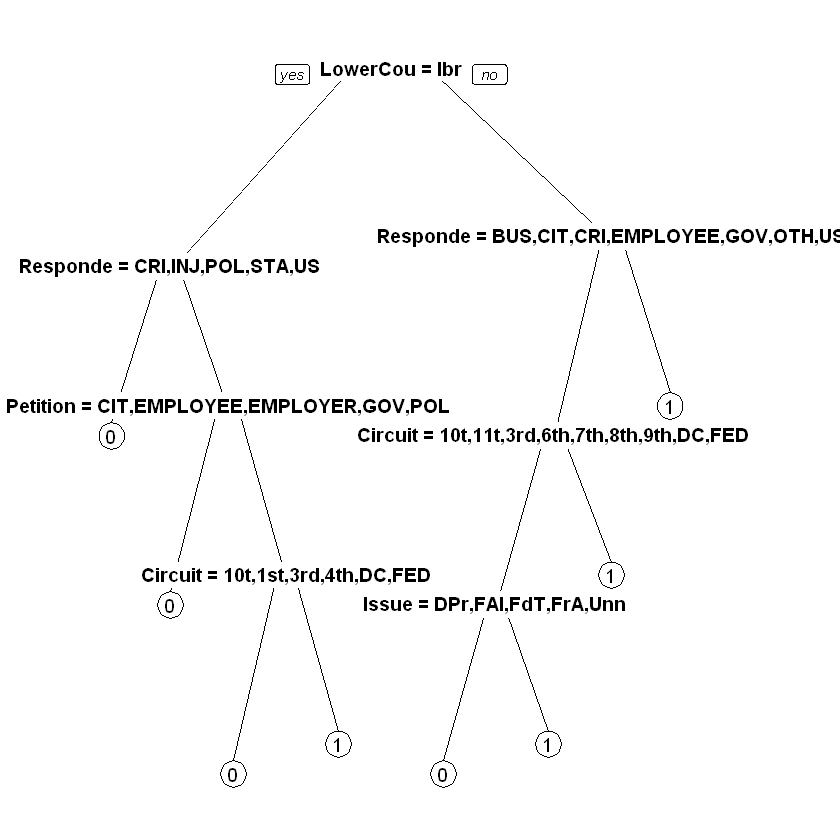

In [47]:
prp(StevensTree)

In [48]:
# #type = "class" -> Majority Class predictions
predictCART = predict(StevensTree, newdata = Test, type = "class")

In [49]:
# #Confusion Matrix
table(Test$Reverse, predictCART)

   predictCART
     0  1
  0 41 36
  1 22 71

In [51]:
# #Accuracy of CART Model
(41+71)/(41+71+36+22)

[1] 0.6588235

In [52]:
# #ROC Curve

In [53]:
library(ROCR)

Warning message:
: package 'ROCR' was built under R version 3.2.5Loading required package: gplots
Warning message:
: package 'gplots' was built under R version 3.2.5
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [54]:
predictROC = predict(StevensTree, newdata = Test)

In [56]:
# #Probablity of Outcome 0 and Outcome 1
predictROC

,0,1
1,0.303571428571429,0.696428571428571
3,0.303571428571429,0.696428571428571
4,0.4,0.6
6,0.4,0.6
8,0.4,0.6
21,0.303571428571429,0.696428571428571
32,0.551724137931034,0.448275862068965
36,0.551724137931034,0.448275862068965
40,0.303571428571429,0.696428571428571
42,0.551724137931034,0.448275862068965


In [57]:
pred = prediction(predictROC[,2], Test$Reverse)

In [59]:
pref = performance(pred, "tpr", "fpr")

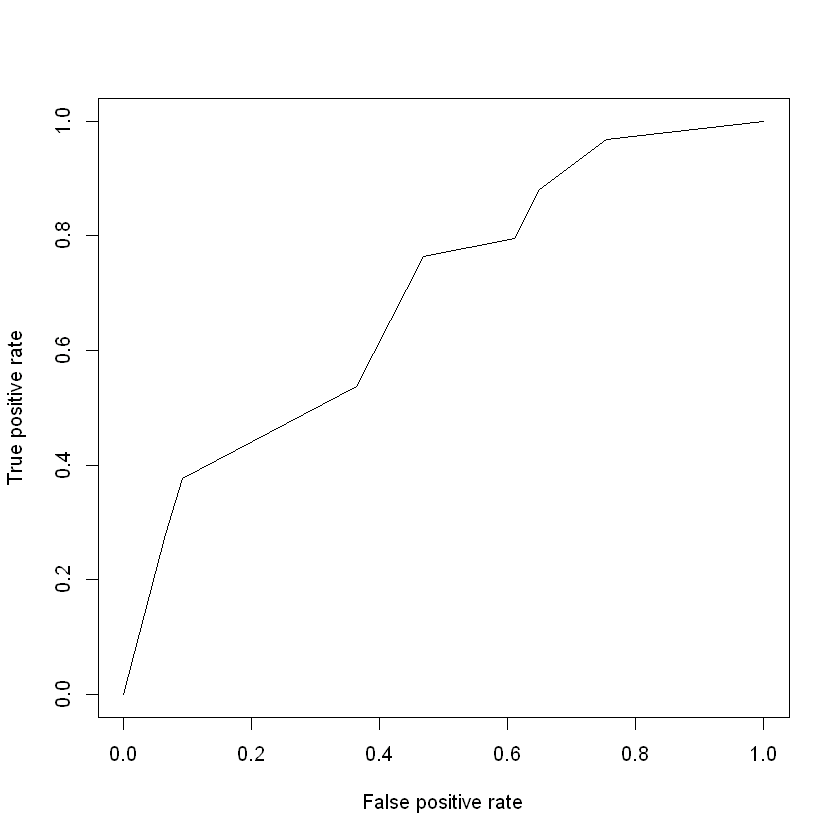

In [61]:
# #ROC Curve
plot(pref)

In [62]:
# #Computing the Test Set AUC
as.numeric(performance(pred, "auc")@y.values)

[1] 0.6927105

In [63]:
StevensTree_1 = rpart(Reverse ~ (Circuit + Issue + Petitioner + Respondent + LowerCourt + Unconst), data = Train, method = "class",
                    minbucket = 5)

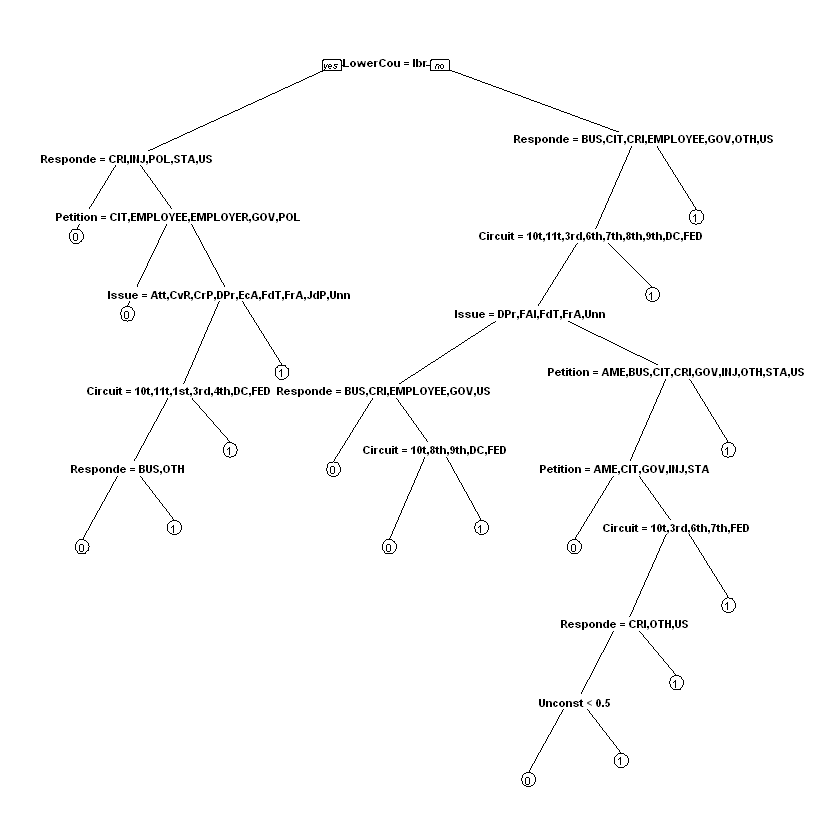

In [64]:
prp(StevensTree_1)

In [65]:
StevensTree_2 = rpart(Reverse ~ (Circuit + Issue + Petitioner + Respondent + LowerCourt + Unconst), data = Train, method = "class",
                    minbucket = 100)

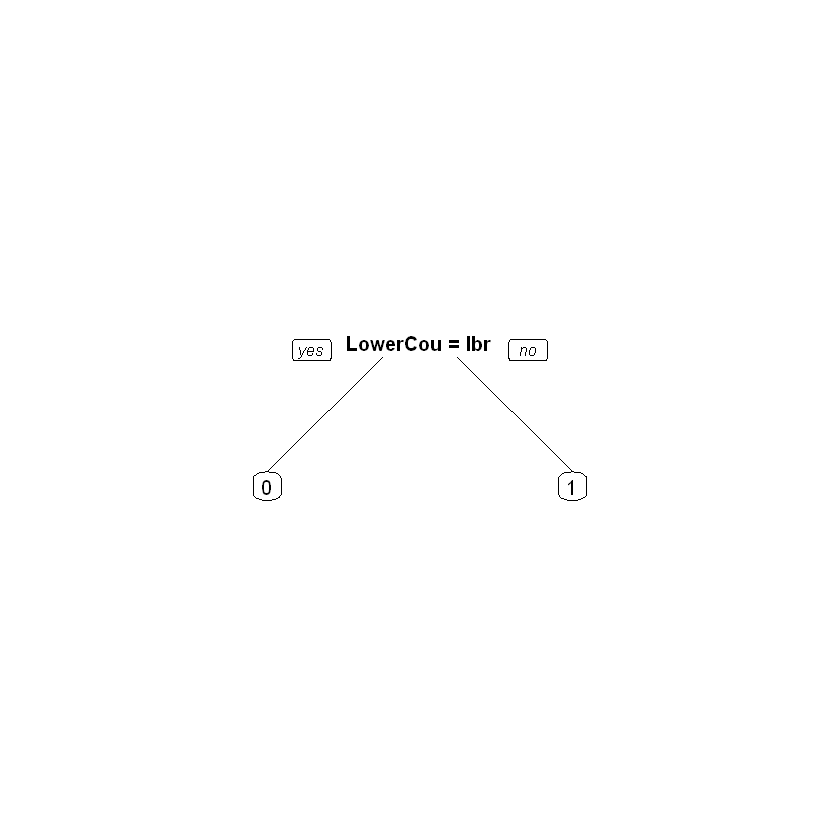

In [66]:
prp(StevensTree_2)